# Étude de marché: entreprise IAA souhaitant exporter du poulet

*Etude data - Projet 5 - Nalron (novembre 2019) / OpenClassrooms - ENSAE-ENSAI Formation Continue*

*Data source* [FAO](http://www.fao.org/faostat/fr/#data)\
*Industrie Agroalimentaire (en abrégé IAA)* 

---

### Clustering hiérarchique CAH de nos données
*Utilisation du package «scipy»*

L'échantillon comporte peu de variables sur la dimension dite du "Régime alimentaire", il comporte également un nombre de pays "maîtrisables" qui permet de commencer par une ***classification hiérarchique***. Algorithme qui a une forte *complexité algorithmique en temps et en espace*, le clustering hiérarchique est recommandé pour les petits échantillons. 

In [58]:
#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()
df_alim.set_index('Pays', inplace=True)
X = df_alim.values
X.shape

(170, 4)

In [59]:
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [60]:
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

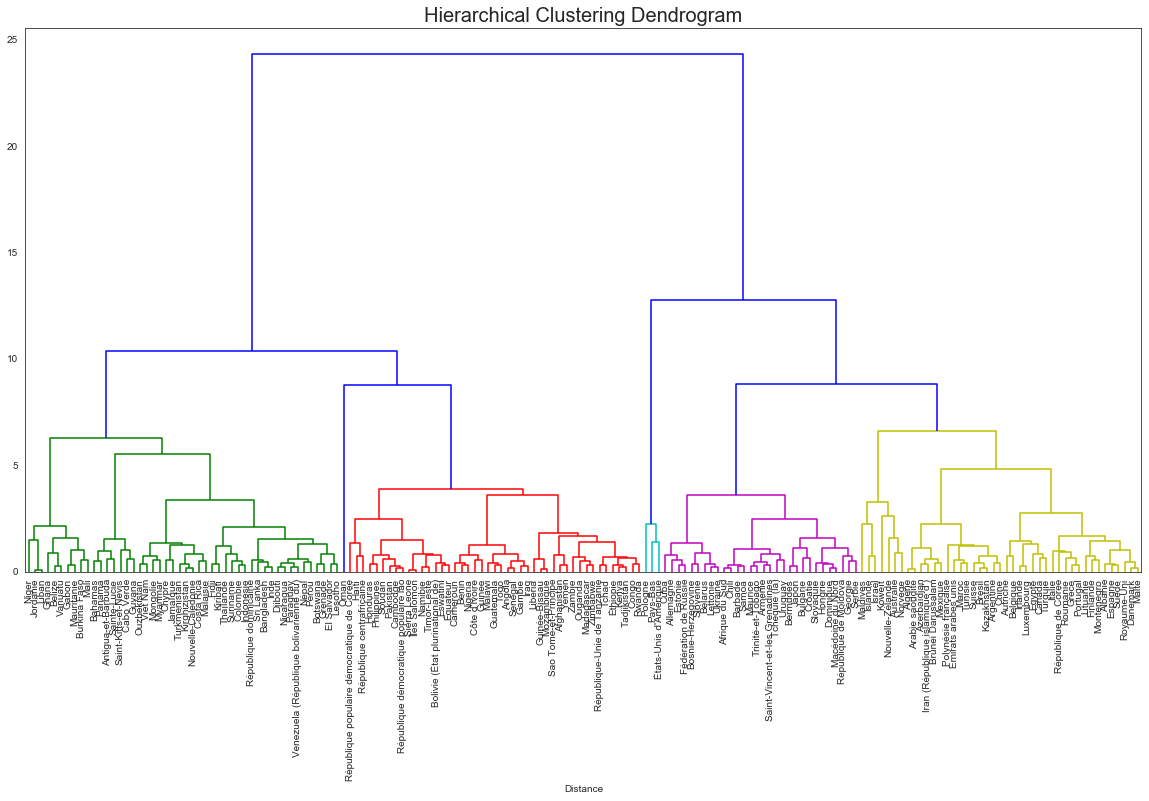

In [62]:
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = df_alim.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.savefig("p5_graphic/dendrogramme.png")
plt.show()

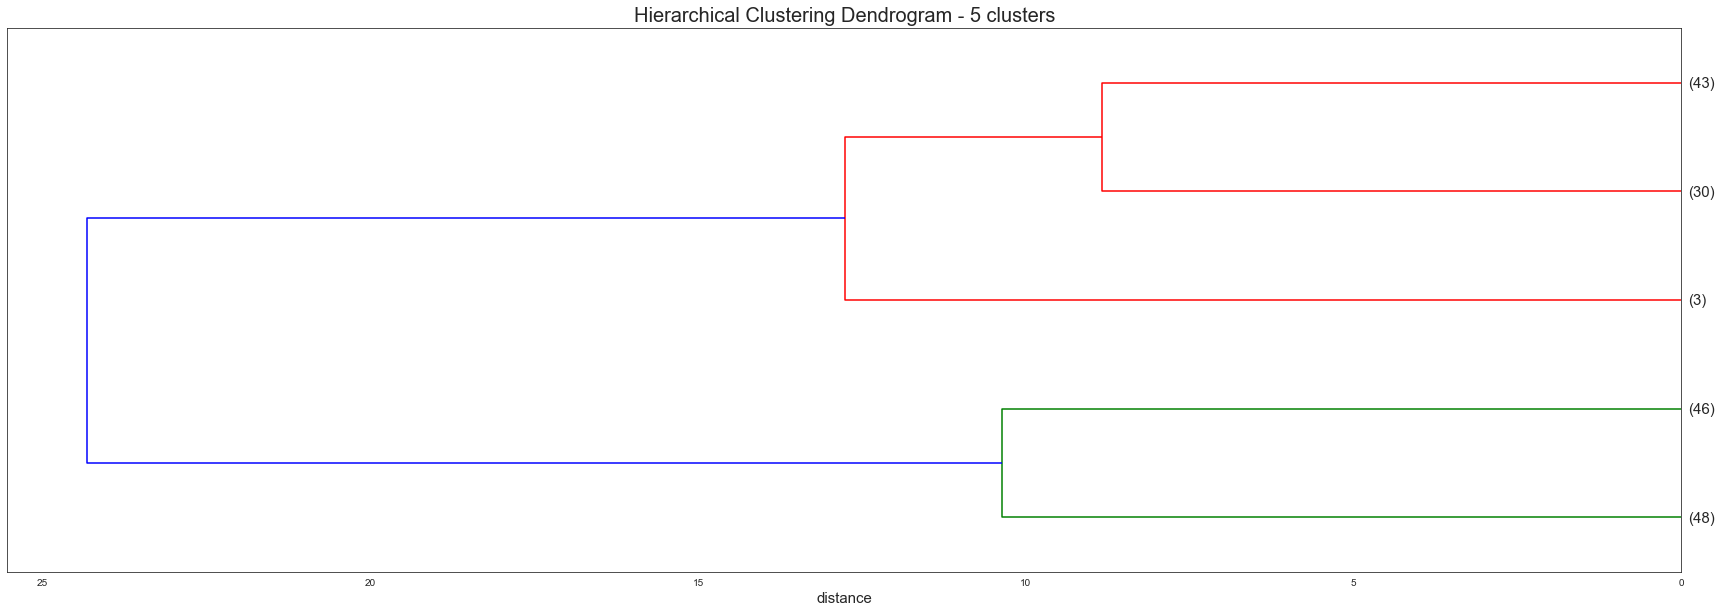

In [63]:
#Coupage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = df_alim.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.savefig("p5_graphic/dendrogramme_clusters5.png")
plt.show()

-> Il apparaît donc 5 groupes de pays, dont un contenant seulement 3 pays. **Voyons comment se présentent ces pays dans leurs groupes**.

In [64]:
#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 5, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des pays selon leurs groupes
df_groupes_cah = pd.DataFrame(df_alim.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'Groupe'})

Numérotation de nos groupes : [1 2 3 4 5]


In [66]:
#Intégration des groupes dans notre échantillon de départ représenté par le dataframe "df_alim"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah = pd.merge(df_alim, df_groupes_cah, on='Pays')

In [67]:
#Aperçu des 5 premières lignes
df_groupes_cah.to_csv('p5_data/pays_groupes5_dendrogramme.csv')
df_groupes_cah.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,Groupe
0,Afghanistan,4176.0,116.51,100.00,2.44,2
1,Afrique du Sud,6042.0,170.65,79.03,0.74,4
2,Albanie,6381.0,222.79,163.30,0.35,5
3,Algérie,6589.0,183.88,51.05,1.89,5
4,Allemagne,7001.0,202.98,103.48,-0.09,4


#### Caractérisation des 5 groupes selon les variables :

In [68]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 5]

In [69]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah.groupby('Groupe').mean()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013
Groupe,,,,
1,5416.895833,149.140625,96.689792,1.475833
2,4687.086957,117.491304,44.692391,2.547826
3,6904.666667,215.043333,739.576667,0.363333
4,6072.800000,174.721667,96.508667,-0.022333
5,6680.604651,209.427907,166.132558,0.927907


-> A partir des centroïdes calculés ci-dessus, **le groupe 3 se différencie par un fort taux de protéines animales/protéines totales**.\
**Le groupe 5 présente également un potentiel marché intéressant** toujours sur l'idée d'un régime alimentaire potentiellement compatible avec les besoins en poulet.

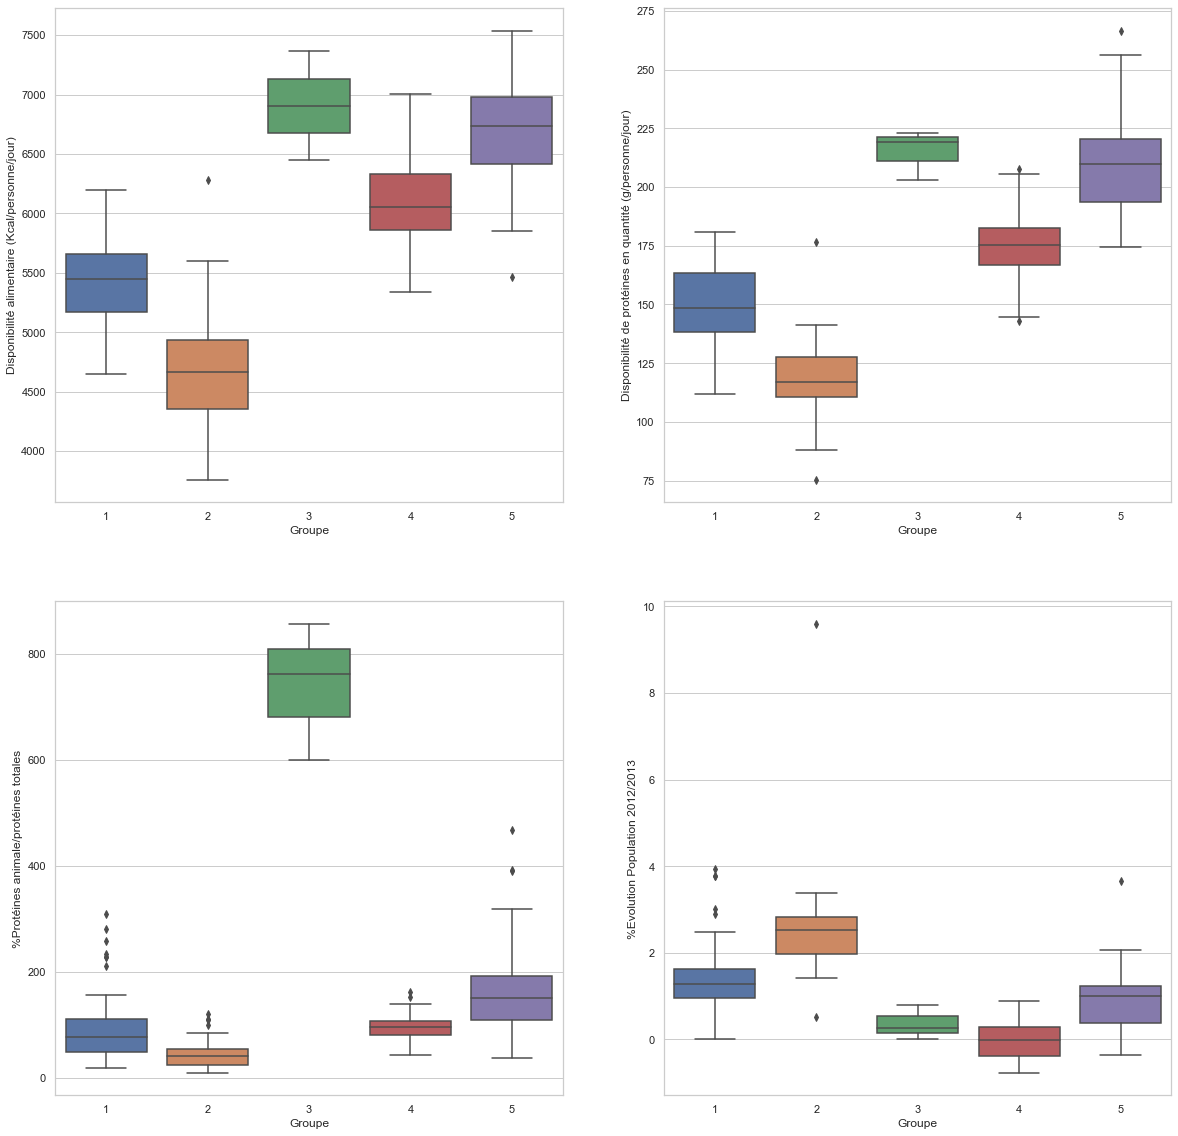

In [70]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='%Protéines animale/protéines totales')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='%Evolution Population 2012/2013')

plt.savefig("p5_graphic/boxplot_dendogramme.png")
plt.show(block=False)

**Les pays du groupe 3 et 5 sont retenus** sur le critère du ratio des protéines animales / totales, mais également sur la disponibilité calorique. Les moyennes calculées ci-dessus ainsi que les réprésentations graphiques permettent d'identifier ces deux groupes comme étant propices à une pénétration du marché.

In [71]:
#Pays du groupe 3 et 5 identifiés comme potentiellement intéressants
print(df_groupe3_cah['Pays'].unique())
print(df_groupe5_cah['Pays'].unique())

['Pays-Bas' 'Pologne' "États-Unis d'Amérique"]
['Albanie' 'Algérie' 'Arabie saoudite' 'Argentine' 'Australie' 'Autriche'
 'Azerbaïdjan' 'Belgique' 'Brunéi Darussalam' 'Brésil' 'Canada' 'Chine'
 'Danemark' 'Espagne' 'Finlande' 'Grèce' "Iran (République islamique d')"
 'Irlande' 'Islande' 'Israël' 'Italie' 'Kazakhstan' 'Koweït' 'Lituanie'
 'Luxembourg' 'Maldives' 'Malte' 'Maroc' 'Mexique' 'Monténégro' 'Norvège'
 'Nouvelle-Zélande' 'Polynésie française' 'Portugal' 'Roumanie'
 'Royaume-Uni' 'République de Corée' 'Suisse' 'Suède' 'Tunisie' 'Turquie'
 'Égypte' 'Émirats arabes unis']


In [72]:
#Élaboration d'un premier sous-ensemble des groupes 3 & 5 validés via la classification hiérarchique
df_cah_subset = df_groupes_cah.query('[3, 5] in Groupe') 
df_cah_subset.shape

(46, 6)

In [73]:
#Visualisation rapide des premières lignes
df_cah_subset.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,Groupe
2,Albanie,6381.0,222.79,163.30,0.35,5
3,Algérie,6589.0,183.88,51.05,1.89,5
7,Arabie saoudite,6511.0,183.22,59.63,1.91,5
8,Argentine,6455.0,205.23,108.86,0.87,5
10,Australie,6553.0,212.55,389.59,1.27,5


En conclusion à ce premier partitionnement ressort que ***46 pays sont susceptibles de devenir une cible pertinente pour l'entreprise***. La demande sera bien présente dans ces pays notamment en termes de besoin en protéines d'origine animale et en termes de calories.

**Appliquons une autre méthode, celle du K-Means pour pouvoir comparer cette première sélection…**

                                         ******************

### Application de l'algorithme du K-Means
*Utilisation du package «scikit-learn»*

Nous allons maintenant réaliser un ***clustering K-Means*** pour plusieurs tailles de clusters, et pour chacune de ces tailles nous allons calculer le *coefficient de silhouette*, puis *l'inertie* pour pouvoir ensuite choisir la taille de cluster la plus appropriée. La méthode de coude nous aidera a conclure sur ce point, mais une critique métier reste essentielle pour la pertinence du nombre de clusters en fonction des objectifs de l'entreprise.

In [74]:
#Préparation des données pour le clustering K-Means
#Transformation en array Numpy
X = df_alim.values

In [75]:
#Centrage / réduction des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

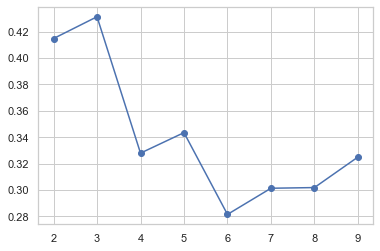

In [76]:
#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

-> La métrique de l'inertie permet également d'avoir une estimation du clustering le plus optimal, voyons ce que ça donne.

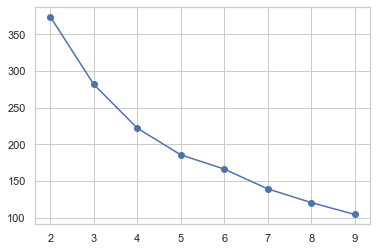

In [77]:
#On crée une liste dans laquelle on stocke les inerties
inerties=[]

#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(2, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 10), inerties, marker='o')
plt.show()

-> Idéalement, pour optimiser et ne pas perdre trop d'information il serait indiquer de choisir un k = 2. 

Maintenant le coefficient de silhouettes expose une possibilité intéressante dans notre contexte métier avec *k = 3 et pourquoi pas k = 5* qui remonte un peu. Un clustering en 3, puis en 5 permettra également de comparer le partitionnement avec les groupes de la classification hiérarchique. *Il est pertinent de comparer les deux méthodes sur le même nombre de clusters.*

In [89]:
#Clustering K-Means en 3 clusters
cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [91]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans3 = cls3.labels_
clusters_kmeans5 = cls5.labels_

### Visualisation des clusters en ACP pour la projection des données

L'ACP (*Analyse en Composante Principale*) permettra une visualisation des clusters pays sur le premier plan factoriel (ou plus). Il deviendra alors facile de pouvoir appréhender le "comportement" des différents groupes.

In [92]:
#Calcul des composantes principales
pca = decomposition.PCA(svd_solver='full')
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [93]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

[0.63746575 0.82768495 0.970698   1.        ]


-> **Plus de 82% de la variance** des données est expliquée par ces deux premières composantes.

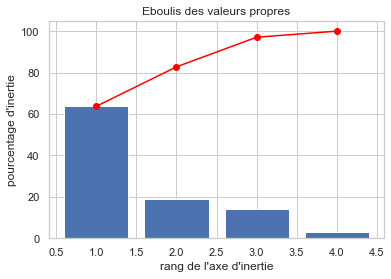

In [94]:
#Représentation de la variance expliquée 
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

-> La méthode du coude précise une forte représentation de nos variables **sur les deux premières composantes principales, le premier axe factoriel**.

### Visualisation des données projetées sur le premier plan factoriel

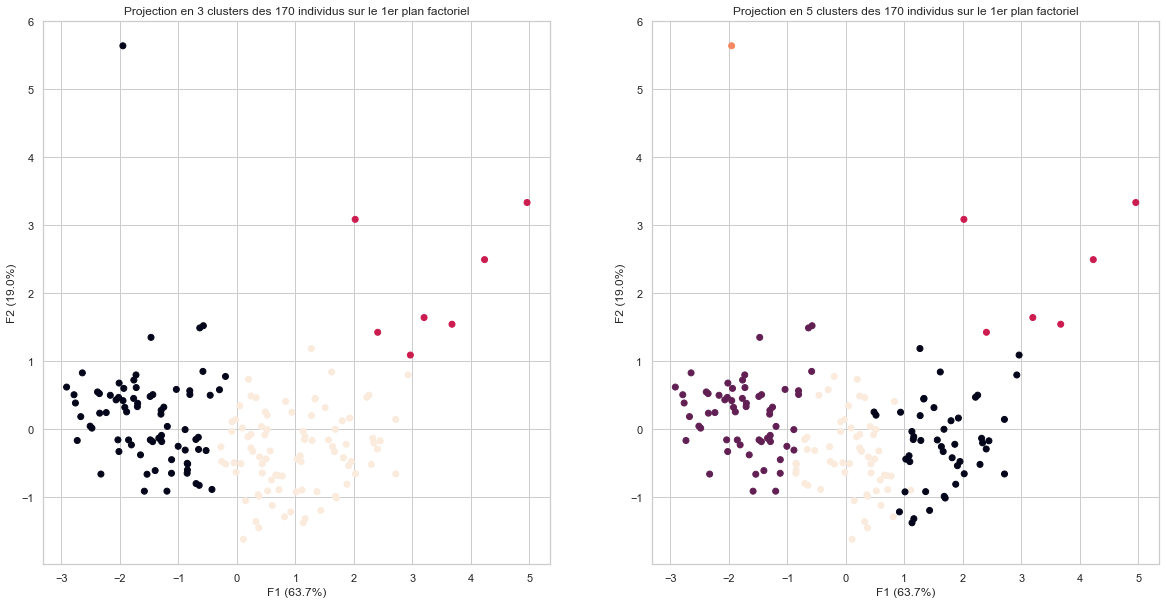

In [95]:
#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls3.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 3 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters_kmeans5)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("p5_graphic/projection_clusters.png")
plt.show()

La projection en 3 clusters est possible, mais l'analyse sera plus fine en 5 clusters. De plus, la comparaison sera possible avec les 5 groupes identifiés lors du précédent partitionnement, le contexte nous oriente davantage vers un clustering en 5 partitions.

Maintenant, il est nécessaire de caractériser chacun de ces groupes selon nos 4 variables. La position des centroïdes de chacun des groupes indiquera le ou les meilleurs clusters. **C'est l'avantage de procéder en K-Means, afin d'obtenir directement des valeurs centrées et réduites, facilitant l'analyse**. ⬇️

In [96]:
#Tableau des Centroïdes 5 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls5.cluster_centers_
pd.DataFrame(centroids, columns=df_alim.columns)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013
0,1.132560,1.149198,0.258635,-0.610903
1,-0.976381,-1.000168,-0.574118,0.793794
2,1.360533,1.385893,4.075729,-0.141640
3,0.687270,0.380713,-0.013873,6.621178
4,-0.062463,-0.048183,-0.038380,-0.440831


In [97]:
#Index trié des clusters
idk = np.argsort(cls5.labels_)

#Affichage des observations selon leurs clusters
df_cls5 = pd.DataFrame(df_alim.index[idk], cls5.labels_[idk]).reset_index()
df_cls5 = df_cls5.rename(columns={'index':'cluster'})

In [98]:
#Intégration des clusters dans notre dataframe "df_cls5" par la méthode .merge()
#Jointure avec le dataframe initial "df_alim" selon les pays et condition 'inner'
df_cls5 = pd.merge(df_alim, df_cls5, on='Pays')
df_cls5.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,cluster
0,Afghanistan,4176.0,116.51,100.00,2.44,1
1,Afrique du Sud,6042.0,170.65,79.03,0.74,4
2,Albanie,6381.0,222.79,163.30,0.35,0
3,Algérie,6589.0,183.88,51.05,1.89,0
4,Allemagne,7001.0,202.98,103.48,-0.09,0


In [100]:
#Affichage des pays retenus dans ce clustering
#Sélection selon l'importance du ratio des protéines animales et dispo. calorique en réponse 
#d'une problématique ciblée sur le régime alimentaire des pays
print(df_cls5[df_cls5['cluster'] == 0]['Pays'].unique())
print(df_cls5[df_cls5['cluster'] == 2]['Pays'].unique())

['Albanie' 'Algérie' 'Allemagne' 'Arabie saoudite' 'Argentine' 'Autriche'
 'Belgique' 'Bosnie-Herzégovine' 'Brésil' 'Bélarus' 'Canada' 'Chine'
 'Cuba' 'Danemark' 'Espagne' 'Estonie' 'Finlande' 'Fédération de Russie'
 'Grèce' 'Irlande' 'Islande' 'Israël' 'Italie' 'Kazakhstan' 'Lettonie'
 'Lituanie' 'Luxembourg' 'Maldives' 'Malte' 'Maroc' 'Monténégro'
 'Nouvelle-Zélande' 'Polynésie française' 'Portugal' 'Roumanie'
 'Royaume-Uni' 'République de Corée' 'Slovénie' 'Suisse' 'Suède'
 'Tchéquie (la)' 'Tunisie' 'Turquie' 'Ukraine' 'Uruguay' 'Égypte'
 'Émirats arabes unis']
['Australie' 'Koweït' 'Norvège' 'Pays-Bas' 'Pologne'
 "États-Unis d'Amérique"]


-> Il est normal de ne pas avoir exactement les mêmes résultats avec la méthode des centres mobiles (K-Means). Le principe est le suivrant, faire varier le nombre de clusters et surveiller l’évolution d’un indicateur de qualité (silhouettes, inerties…), c'est-à-dire l’aptitude des pays à être plus proches de ses congénères du même cluster que les pays des autres clusters.

A ce stade de l'analyse, il est important de noter qu'un bloc de pays semble avoir une certaine importance. En effet, à l'issue de la classification hiérarchique nous avions **Pays-Bas, Pologne, États-Unis d'Amérique**, et en K-Means nous avons **Pays-Bas, Pologne, États-Unis d'Amérique avec Norvège, Australie et le Koweït**. Sur une problématique de recherche purement "alimentaire", sans tenir compte d'autres facteurs, ces pays pourraient-être directement retenus.

In [101]:
#La correspondance avec les groupes du partitionnement hiérarchique peut-être analysée avec une méthode .crosstab()
pd.crosstab(groupes_cah, cls5.labels_)

col_0,0,1,2,3,4
row_0,,,,,
1,0,15,0,0,33
2,0,45,0,1,0
3,0,0,3,0,0
4,11,0,0,0,19
5,36,0,3,0,4


-> Sur la méthode hiérarchique le choix a été fait sur les groupes 3 et 5, avec les K-Means se sont les clusters 0 et 2. Les correspondances ci-dessus montrent *plusieurs pays communs aux deux approches*.

In [103]:
#Création d'un sous-ensemble avec sélection des pays des deux clusters 1 & 2 validés
df_cls_subset = df_cls5.query('[0, 2] in cluster') 
df_cls_subset.shape

(53, 6)

In [104]:
#Visualisation des premières lignes de notre nouvel échantillon 
#Les correspondances des clusters sont bien intégrés…
df_cls_subset.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,cluster
2,Albanie,6381.0,222.79,163.30,0.35,0
3,Algérie,6589.0,183.88,51.05,1.89,0
4,Allemagne,7001.0,202.98,103.48,-0.09,0
7,Arabie saoudite,6511.0,183.22,59.63,1.91,0
8,Argentine,6455.0,205.23,108.86,0.87,0


Dans le cadre des objectifs demandés la liste ci-dessus de ***53 pays est trop importante***. Il est nécessaire d'affiner l'échantillon en une liste plus sélective. Voyons tout de suite comment procéder pour affiner nos choix.

--- 

### Approfondir l'analyse en apportant d'autres variables au nouvel échantillon des 53 pays

Afin d'affiner l'analyse, trois variables complémentaires seront intégrées. La première (PIB/habitant US$) donnera une dimension économique des pays, la capacité de la population à pouvoir acheter (ou pas) des produits importés. Les deux autres seront directement liées au marché, aux connaissances métier macroéconomique, on parlera alors d'importation de poulets vivants des 53 pays identifiés, ainsi que leur capacité d'élevage du poulet.

In [105]:
#Jointure de notre dataframe global "df" à celui du sous-ensemble identifié "df_cls_subset"
df_subset = pd.merge(df[['Pays', 'PIB/habitant US$', 'Import Poulet en valeur 1000 US$', 
                         'Élevage Poulet 1000 têtes']], df_cls_subset, on='Pays')
del df_subset['cluster']
df_subset.head()

,Pays,PIB/habitant US$,Import Poulet en valeur 1000 US$,Élevage Poulet 1000 têtes,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013
0,Albanie,10492.7,5821.0,8928.0,6381.0,222.79,163.30,0.35
1,Algérie,13322.6,22905.0,130000.0,6589.0,183.88,51.05,1.89
2,Allemagne,42914.5,173124.0,160774.0,7001.0,202.98,103.48,-0.09
3,Arabie saoudite,49359.5,26985.0,181500.0,6511.0,183.22,59.63,1.91
4,Argentine,19637.8,10923.0,107000.0,6455.0,205.23,108.86,0.87


In [106]:
#53 Pays sur nos 7 variables, indexation selon les pays de l'échantillon "df_subset"
df_subset.set_index('Pays', inplace=True)
df_subset.shape

(53, 7)

In [107]:
#Transformation de l'échantillon en données array numpy
Xs = df_subset.values

In [108]:
#Centrage / réduction des données
std_scale = preprocessing.StandardScaler().fit(Xs)
Xs_scaled = std_scale.transform(Xs)

-> Jusqu'ici nos variables étaient essentiellement tournées vers une problématique liée au régime alimentaire des pays. D'autres variables sont venues enrichir notre échantillon afin d'extraire des précisions complémentaires, donc une analyse plus fine. Voyons ce que peuvent nous apprendre toutes nos variables.

#### Projection des variables sur le premier plan factoriel :
Le but étant de pouvoir simplifier l'ensemble des variables en deux principales variables, afin de pouvoir identifier des similitudes. On parlera alors de *corrélation des variables*.

In [109]:
#Calcul des composantes principales: instanciation de l'objet pcas
pcas = decomposition.PCA(svd_solver='full')
pcas.fit(Xs_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

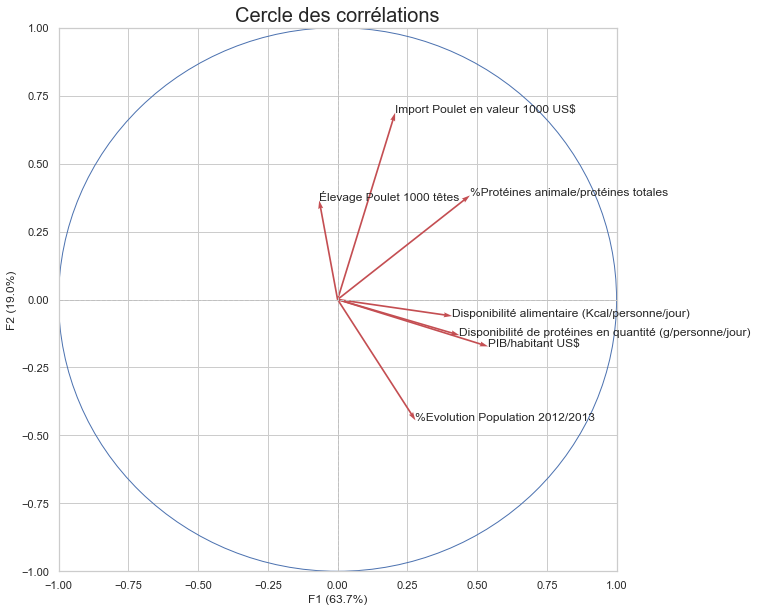

In [110]:
#Cercle des corrélations de nos variables
pcs = pcas.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df_subset.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.savefig("p5_graphic/cercle_correlation.png")
plt.show()

-> **Recherche des groupes de variables** fortement corrélées deux à deux entre elles, l'objectif est de pouvoir les synthétiser par une variable unique F1 et F2 (nos composantes principales).

In [111]:
#Calcul des composantes principales
#Ici seulement F1 et F2 seront utiles à l'interprétation attendue
Xs_projected = pcas.transform(Xs_scaled)

df_facto = pd.DataFrame(Xs_projected, index=df_subset.index, columns=["F" + str(i+1) for i in range(7)]).iloc[:, :2]
df_facto.head() #Affichage des 5 premières lignes

,F1,F2
Pays,,
Albanie,-0.867229,-0.059644
Algérie,-1.171207,-0.822674
Allemagne,0.355330,1.046083
Arabie saoudite,-0.122583,-1.096107
Argentine,-0.866687,-0.383885


In [112]:
#Coefficients de la composante principale F1
F1 = pcas.components_[0]
print(F1) 
#Coefficients de la composante principale F2
F2 = pcas.components_[1]
print(F2)

[ 0.53944095  0.2063536  -0.06582849  0.41042127  0.43659916  0.47441251
  0.27920706]
[-0.17255202  0.68705449  0.36446816 -0.06072768 -0.13124599  0.38297506
 -0.44470398]


- Sur la **composante F1** on peut identifier un groupe de variables plus représentatif du **régime alimentaire**.
- Sur la **composante F2** la réprésentation des variables se rapproche davantage d'une **dimension Marché** (import, élevage…).

-> Nos données sont enrichies par une nouvelle dimension, ce qui permettra d'affiner nos choix en tenant compte cette fois-ci *de connaissances marché et métier*, mais aussi des corrélations identifiées.

#### Clustering K-Means sur notre échantillon "df_subset" :

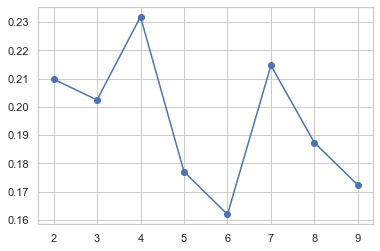

In [113]:
#Calcul de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(Xs_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(Xs_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

**Un nouveau clustering en 4 clusters semble être une solution adéquate à nos données**. Derrière cette aide à la décision du nombre idéal de clusters par rapport aux informations que nous perdrons, il est important de garder à l'esprit notre objectif métier, celui de pouvoir obtenir une liste de pays assez "courte" donc exploitable pour d'autres analyses futures, par exemple en intégrant des dimensions métier propre à notre entreprise.

In [114]:
#Nouveau clustering avec k = 4
cls4 = cluster.KMeans(n_clusters=4)
cls4.fit(Xs_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [115]:
#Tableau d'aide à la comparaison des clusters par les centroïdes
centroids = cls4.cluster_centers_
df_centroides = pd.DataFrame(centroids, columns=df_subset.columns)
df_centroides.to_csv('p5_data/centroides_clusters.csv')
df_centroides 

,PIB/habitant US$,Import Poulet en valeur 1000 US$,Élevage Poulet 1000 têtes,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013
0,-0.600005,-0.208516,-0.157224,-0.431005,-0.300385,-0.249598,-0.281560
1,-1.089849,0.429831,6.490499,-1.210698,-0.585347,-0.586444,-0.048438
2,0.824400,6.054341,-0.169250,-0.625209,0.780522,3.541668,-0.484869
3,0.943280,-0.001009,-0.072365,0.759853,0.455839,0.239116,0.463083


In [116]:
#Index trié des clusters
idk = np.argsort(cls4.labels_)

#Affichage des observations selon leurs clusters
df_cls4 = pd.DataFrame(df_subset.index[idk], cls4.labels_[idk]).reset_index()
df_cls4 = df_cls4.rename(columns={'index':'cluster'})

In [117]:
#Intégration des numéros de cluster pour chacun des pays restants
#Jointure interne avec le dataframe "df_subset" des 53 pays vu précédemment 
df_cls4 = pd.merge(df_subset, df_cls4, on='Pays')
df_cls4.shape

(53, 9)

In [118]:
#Visu. des premières lignes… l'échantillon semble "propre" et complet avec toutes nos variables 
df_cls4.to_csv('p5_data/pays_clusters4.csv')
df_cls4.head()

,Pays,PIB/habitant US$,Import Poulet en valeur 1000 US$,Élevage Poulet 1000 têtes,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,cluster
0,Albanie,10492.7,5821.0,8928.0,6381.0,222.79,163.30,0.35,0
1,Algérie,13322.6,22905.0,130000.0,6589.0,183.88,51.05,1.89,0
2,Allemagne,42914.5,173124.0,160774.0,7001.0,202.98,103.48,-0.09,3
3,Arabie saoudite,49359.5,26985.0,181500.0,6511.0,183.22,59.63,1.91,3
4,Argentine,19637.8,10923.0,107000.0,6455.0,205.23,108.86,0.87,0


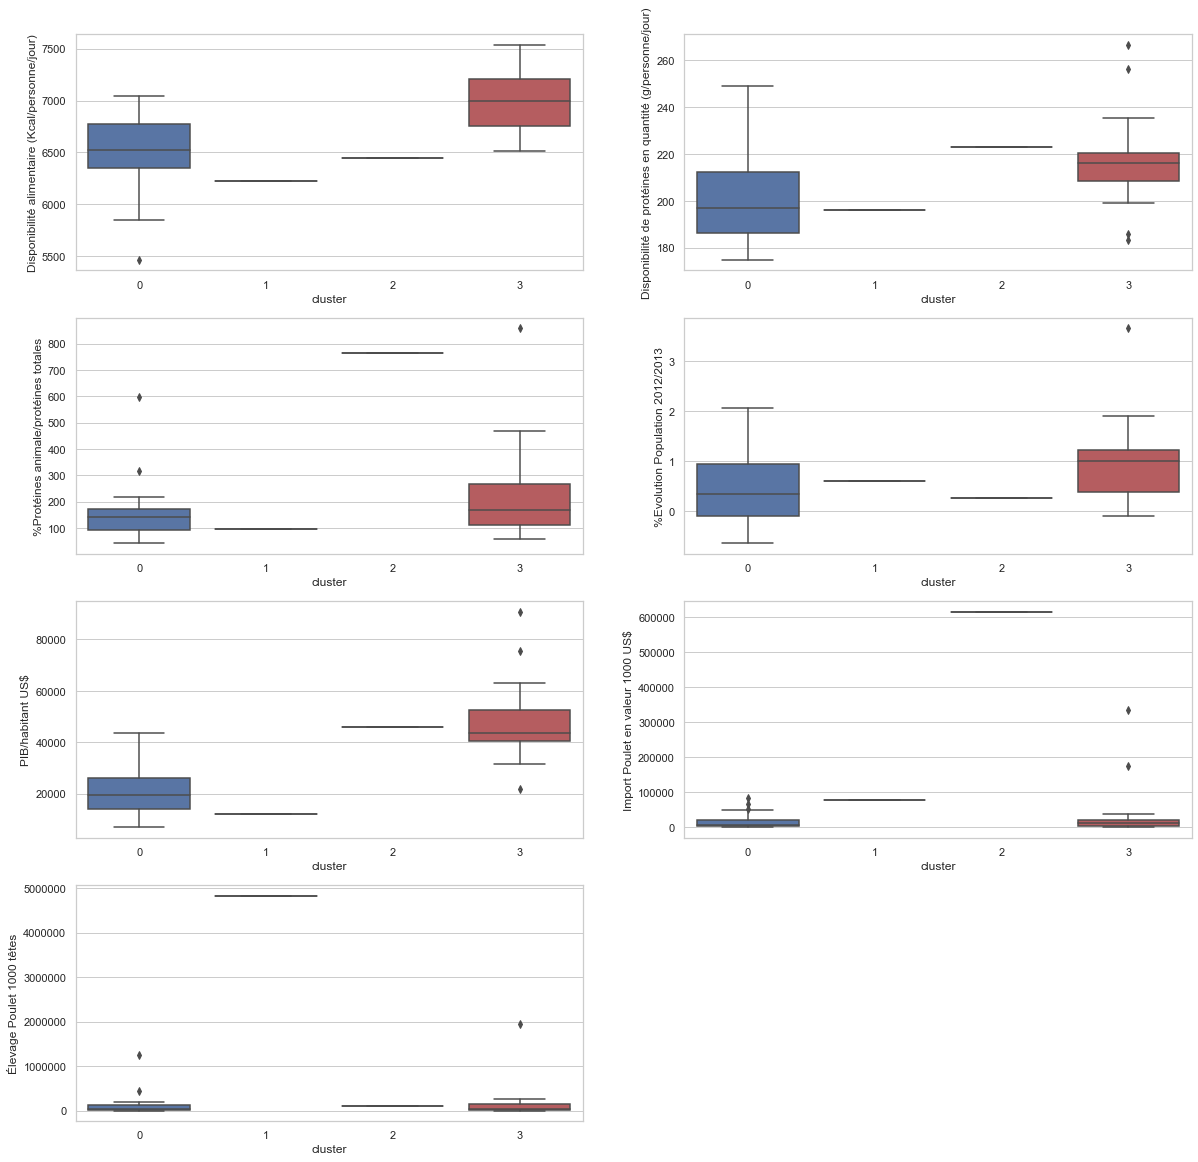

In [119]:
#Visualisation et caractérisation des groupes par Boxplot
plt.figure(figsize=(20, 20))

plt.subplot(421)
sns.boxplot(data=df_cls4, x='cluster', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(422)
sns.boxplot(data=df_cls4, x='cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(423)
sns.boxplot(data=df_cls4, x='cluster', y='%Protéines animale/protéines totales')

plt.subplot(424)
sns.boxplot(data=df_cls4, x='cluster', y='%Evolution Population 2012/2013')

plt.subplot(425)
sns.boxplot(data=df_cls4, x='cluster', y='PIB/habitant US$')

plt.subplot(426)
sns.boxplot(data=df_cls4, x='cluster', y='Import Poulet en valeur 1000 US$')

plt.subplot(427)
sns.boxplot(data=df_cls4, x='cluster', y='Élevage Poulet 1000 têtes')

plt.show(block=False)

#### Ci-dessous voyons les clusters plus en détails :

In [120]:
#Taille des clusters
print(str(len(df_cls4[df_cls4['cluster'] == 0]['Pays'])) + " pays dans le cluster 0")
print(str(len(df_cls4[df_cls4['cluster'] == 1]['Pays'])) + " pays dans le cluster 1")
print(str(len(df_cls4[df_cls4['cluster'] == 2]['Pays'])) + " pays dans le cluster 2")
print(str(len(df_cls4[df_cls4['cluster'] == 3]['Pays'])) + " pays dans le cluster 3")

31 pays dans le cluster 0
1 pays dans le cluster 1
1 pays dans le cluster 2
20 pays dans le cluster 3


In [121]:
#Pays du cluster 0
df_cls4[df_cls4['cluster'] == 0]['Pays'].unique()

array(['Albanie', 'Algérie', 'Argentine', 'Bosnie-Herzégovine', 'Brésil',
       'Bélarus', 'Cuba', 'Espagne', 'Estonie', 'Fédération de Russie',
       'Grèce', 'Kazakhstan', 'Lettonie', 'Lituanie', 'Maldives', 'Malte',
       'Maroc', 'Monténégro', 'Nouvelle-Zélande', 'Pologne',
       'Polynésie française', 'Portugal', 'Roumanie',
       'République de Corée', 'Slovénie', 'Suède', 'Tchéquie (la)',
       'Tunisie', 'Ukraine', 'Uruguay', 'Égypte'], dtype=object)

In [122]:
#Pays du cluster 1
df_cls4[df_cls4['cluster'] == 1]['Pays'].unique()

array(['Chine'], dtype=object)

In [123]:
#Pays du cluster 2
df_cls4[df_cls4['cluster'] == 2]['Pays'].unique()

array(['Pays-Bas'], dtype=object)

In [124]:
#Pays du cluster 3
df_cls4[df_cls4['cluster'] == 3]['Pays'].unique()

array(['Allemagne', 'Arabie saoudite', 'Australie', 'Autriche',
       'Belgique', 'Canada', 'Danemark', 'Finlande', 'Irlande', 'Islande',
       'Israël', 'Italie', 'Koweït', 'Luxembourg', 'Norvège',
       'Royaume-Uni', 'Suisse', 'Turquie', 'Émirats arabes unis',
       "États-Unis d'Amérique"], dtype=object)

-> Ensuite, selon la stratégie de l'entreprise, le choix sera fait selon des hypothèses posées que l'on verra un peu plus loin…

Par exemple, si l'objectif est de cibler les pays au plus haut PIB/habitant (voir ci-dessous)

In [125]:
#Clusters représentatifs des pays cibles à fort PIB avec également un fort ratio des protéines animales / totales
#Le cluster 2 est plus atypique, seulement un seul pays identifié comme étant en plus importateur de poulets
print(df_cls4[df_cls4['cluster'] == 2]['Pays'].unique())
print(df_cls4[df_cls4['cluster'] == 3]['Pays'].unique())

['Pays-Bas']
['Allemagne' 'Arabie saoudite' 'Australie' 'Autriche' 'Belgique' 'Canada'
 'Danemark' 'Finlande' 'Irlande' 'Islande' 'Israël' 'Italie' 'Koweït'
 'Luxembourg' 'Norvège' 'Royaume-Uni' 'Suisse' 'Turquie'
 'Émirats arabes unis' "États-Unis d'Amérique"]


-> Le ou les choix se feront en fonction des enjeux et de la stratégie décidée par l'entreprise. Des hypothèses seront posées, et elles devront trouver des réponses, des propositions qui serviront à aiguiller notre stratégie.

#### Représentation de nos 5 clusters sur le premier plan factoriel (F1, F2) :

In [126]:
#Pourcentage de la variance expliquée
pcas.explained_variance_ratio_.cumsum()

array([0.29837083, 0.48381967, 0.63731684, 0.75923004, 0.87086543,
       0.93899213, 1.        ])

-> **Près de 50%** de la variance est expliquée avec les deux premières composantes principales.

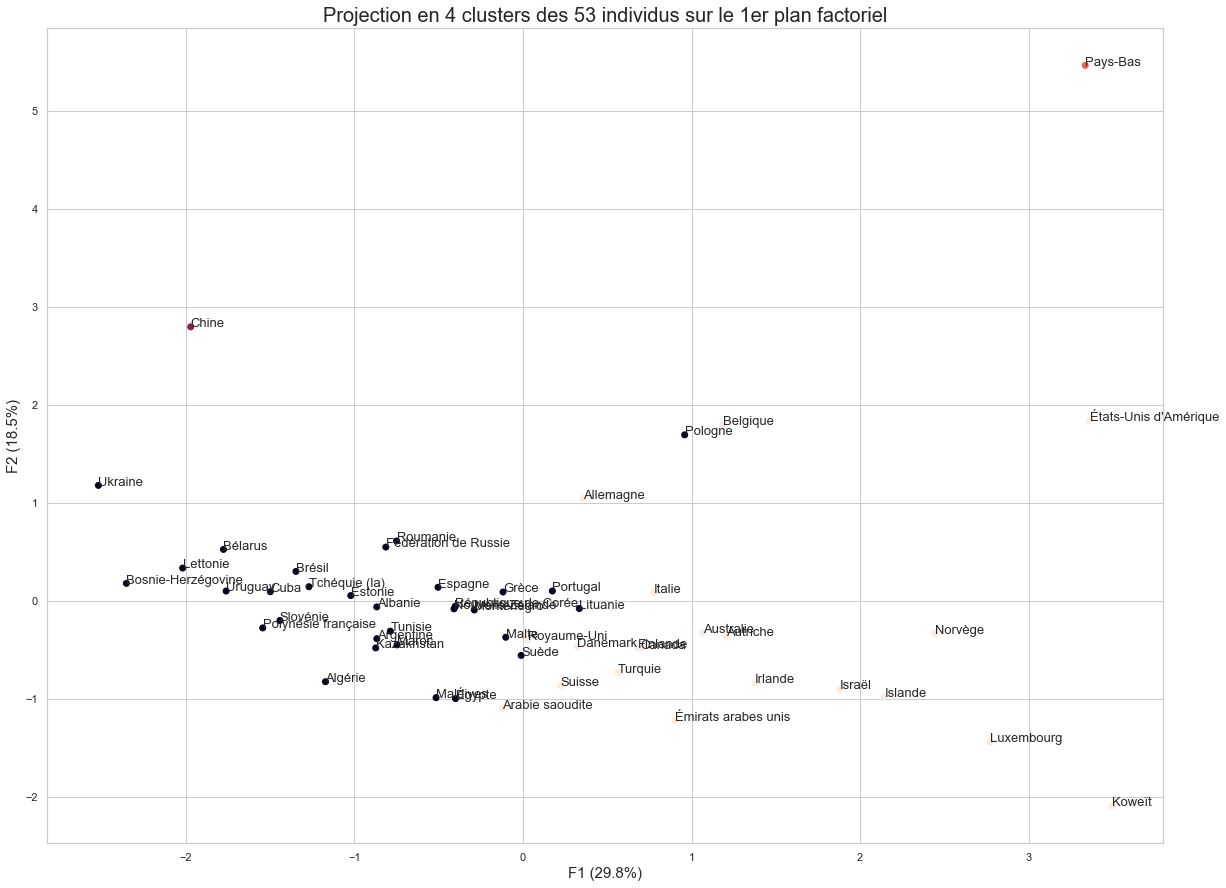

In [127]:
#Projection des 4 clusters sur le premier plan factoriel (F1, F2)
#Coordonnées factorielles 
Xs_projected = pcas.transform(Xs_scaled)
plt.figure(figsize=(20, 15))

plt.scatter(Xs_projected[:, 0], Xs_projected[:, 1], c=cls4.labels_)
for i,(x,y) in enumerate(Xs_projected[:,[0,1]]):
                    plt.text(x, y, df_subset.index[i], fontsize='13') 

plt.xlabel('F{} ({}%)'.format(1, round(100*pcas.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('F{} ({}%)'.format(2, round(100*pcas.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(Xs_projected.shape[0]), fontsize=20)

plt.savefig("p5_graphic/projection_cluster_4.png")
plt.show()

Cette projection est très intéressante car elle nous apporte une vision du potentiel des pays. Par exemple, les pays plus à droite présentent un meilleur PIB/habitant avec un potientiel en dispo. protéines et caloriques élevées. Les pays positionnés plus haut seront davantage intéressant sur un aspect habitude d'importation de poulets vivants, etc… Mais pas seulement, car il apparaît également des pays de l'UE et ceux hors UE.

#### Contribution des pays dans l'inertie totale :
Il existe d'autres méthodes pour pouvoir continuer l'exploration de nos données, nous nous limiterons à celle-ci. ***Par exemple, voyons les différentes contributions des pays dans l'inertie totale***.

In [128]:
#Affichage des 40 pays les plus contributeurs 
di = np.sum(Xs_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame(di, index=df_subset.index, columns=['d_i']).sort_values(by='d_i', ascending=False)
ctr_indiv_inertie[:40]

,d_i
Pays,
Pays-Bas,51.141931
Chine,45.653790
États-Unis d'Amérique,27.532705
Koweït,23.833319
Maldives,18.027205
Belgique,14.761065
Luxembourg,14.043477
Islande,10.390709
Ukraine,8.461012


-> **Les premiers pays de l'UE** dont la contribution dans l'inertie totale est "maximale" sont : *Pays-Bas, Belgique, Allemagne, Pologne, Luxembourg*. Ce choix a également été fait en tenant compte de la proximité géographique des cibles. On remarquera que ces pays font partis du cluster 2 pour les Pays-Bas et pour les autres du cluster 3.

[Retour vers la page notebook précédente sur la préparation de l'échantillon.](https://github.com/nalron/project_market_study/blob/french_version/p5_notebook01.ipynb)

[Suite de l'analyse par la vérification des groupes distincts, tests statistiques (Shapiro-Wilk, Kolmogorov-Smirnov…)](https://github.com/nalron/project_market_study/blob/french_version/p5_notebook03.ipynb)